In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

In [4]:
outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [5]:
fraud = pd.read_csv('Train-1542865627584.csv')

In [6]:
ip = inpatient[['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode']]
op = outpatient[['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode']]

In [7]:
patient = pd.concat([ip, op])

#### Find Duplicates based on claim amount: where patients get charged same amount 2+ times by same provider

In [8]:
patient_duplicate = patient.groupby(['Provider','BeneID','InscClaimAmtReimbursed'])[['ClaimID']].nunique().reset_index()

In [9]:
patient_duplicate = patient_duplicate[patient_duplicate['InscClaimAmtReimbursed'] > 0]

In [10]:
patient_duplicate = patient_duplicate[patient_duplicate['ClaimID'] > 1]

In [11]:
patient_duplicate = patient_duplicate.groupby('Provider')[['BeneID']].count().sort_values(by='BeneID', ascending=False)

In [12]:
# This represents the providers who have billed the same patient the same amount at least twice and the number of times it was done
patient_duplicate.head()

BeneID
Provider        
PRV51459     686
PRV51574     396
PRV53797     324
PRV54895     248
PRV56011     222

<AxesSubplot:>

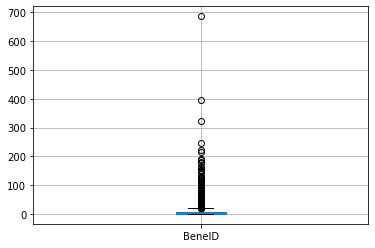

In [13]:
# Most providers have <10 instances of billing the same patient the same amount twice, but there were quite a few where they have high counts of this

patient_duplicate.boxplot()

In [14]:
patient_duplicate_100 = patient_duplicate.head(100)

In [15]:
patient_duplicate_100 = pd.merge(patient_duplicate_100, fraud, on= "Provider")

In [16]:
patient_duplicate_100

Provider  BeneID PotentialFraud
0   PRV51459     686            Yes
1   PRV51574     396            Yes
2   PRV53797     324            Yes
3   PRV54895     248            Yes
4   PRV56011     222            Yes
5   PRV53918     217            Yes
6   PRV55039     192            Yes
7   PRV55004     187            Yes
8   PRV57103     180            Yes
9   PRV52064     177            Yes
10  PRV54837     163            Yes
11  PRV56560     161            Yes
12  PRV57172     154            Yes
13  PRV55467     153            Yes
14  PRV51480     150            Yes
15  PRV51836     150            Yes
16  PRV51347     146            Yes
17  PRV54772     131            Yes
18  PRV52985     130            Yes
19  PRV52030     129            Yes
20  PRV51369     127            Yes
21  PRV56689     125            Yes
22  PRV52340     121            Yes
23  PRV54350     118            Yes
24  PRV55913     115            Yes
25  PRV54778     113            Yes
26  PRV54742     108            Yes
27  PRV52041     107            Yes
28  PRV56416     106            Yes
29  PRV53394     106             No
30  PRV52066     106            Yes
31  PRV53750     105             No
32  PRV55525     104             No
33  PRV53786     103            Yes
34  PRV53871      97             No
35  PRV52059      97            Yes
36  PRV51005      94            Yes
37  PRV52648      92            Yes
38  PRV51567      91            Yes
39  PRV54372      90            Yes
40  PRV56442      87            Yes
41  PRV52605      86             No
42  PRV57306      84            Yes
43  PRV52884      83            Yes
44  PRV57191      83            Yes
45  PRV51393      82            Yes
46  PRV52337      81            Yes
47  PRV53895      81            Yes
48  PRV51433      80            Yes
49  PRV56008      76            Yes
50  PRV55552      73             No
51  PRV51244      72            Yes
52  PRV54786      71            Yes
53  PRV53623      71            Yes
54  PRV54688      70            Yes
55  PRV53385      69            Yes
56  PRV56019      69             No
57  PRV54564      68             No
58  PRV51410      68            Yes
59  PRV52114      68            Yes
60  PRV52827      67             No
61  PRV56556      67             No
62  PRV53900      67            Yes
63  PRV55462      65            Yes
64  PRV55934      65            Yes
65  PRV52104      64             No
66  PRV54690      63             No
67  PRV57335      62            Yes
68  PRV57209      62            Yes
69  PRV52649      61            Yes
70  PRV52628      60            Yes
71  PRV55453      60            Yes
72  PRV53677      60            Yes
73  PRV52980      59             No
74  PRV56444      59            Yes
75  PRV56006      59             No
76  PRV51860      59             No
77  PRV51509      58             No
78  PRV52395      58             No
79  PRV56270      58             No
80  PRV52071      57             No
81  PRV56437      56            Yes
82  PRV57715      56             No
83  PRV52982      55            Yes
84  PRV55715      54            Yes
85  PRV55215      54            Yes
86  PRV56248      53             No
87  PRV55977      53            Yes
88  PRV57151      53             No
89  PRV54075      53            Yes
90  PRV52141      52             No
91  PRV57170      52            Yes
92  PRV56608      51            Yes
93  PRV53960      51             No
94  PRV55479      50             No
95  PRV54745      50             No
96  PRV52560      50             No
97  PRV53887      49            Yes
98  PRV52859      48             No
99  PRV56803      47             No

In [17]:
patient_duplicate_100.insert(0, 'Rank', range(1, 1 + len(patient_duplicate_100)))
patient_duplicate_100

Rank  Provider  BeneID PotentialFraud
0      1  PRV51459     686            Yes
1      2  PRV51574     396            Yes
2      3  PRV53797     324            Yes
3      4  PRV54895     248            Yes
4      5  PRV56011     222            Yes
5      6  PRV53918     217            Yes
6      7  PRV55039     192            Yes
7      8  PRV55004     187            Yes
8      9  PRV57103     180            Yes
9     10  PRV52064     177            Yes
10    11  PRV54837     163            Yes
11    12  PRV56560     161            Yes
12    13  PRV57172     154            Yes
13    14  PRV55467     153            Yes
14    15  PRV51480     150            Yes
15    16  PRV51836     150            Yes
16    17  PRV51347     146            Yes
17    18  PRV54772     131            Yes
18    19  PRV52985     130            Yes
19    20  PRV52030     129            Yes
20    21  PRV51369     127            Yes
21    22  PRV56689     125            Yes
22    23  PRV52340     121            Yes
23    24  PRV54350     118            Yes
24    25  PRV55913     115            Yes
25    26  PRV54778     113            Yes
26    27  PRV54742     108            Yes
27    28  PRV52041     107            Yes
28    29  PRV56416     106            Yes
29    30  PRV53394     106             No
30    31  PRV52066     106            Yes
31    32  PRV53750     105             No
32    33  PRV55525     104             No
33    34  PRV53786     103            Yes
34    35  PRV53871      97             No
35    36  PRV52059      97            Yes
36    37  PRV51005      94            Yes
37    38  PRV52648      92            Yes
38    39  PRV51567      91            Yes
39    40  PRV54372      90            Yes
40    41  PRV56442      87            Yes
41    42  PRV52605      86             No
42    43  PRV57306      84            Yes
43    44  PRV52884      83            Yes
44    45  PRV57191      83            Yes
45    46  PRV51393      82            Yes
46    47  PRV52337      81            Yes
47    48  PRV53895      81            Yes
48    49  PRV51433      80            Yes
49    50  PRV56008      76            Yes
50    51  PRV55552      73             No
51    52  PRV51244      72            Yes
52    53  PRV54786      71            Yes
53    54  PRV53623      71            Yes
54    55  PRV54688      70            Yes
55    56  PRV53385      69            Yes
56    57  PRV56019      69             No
57    58  PRV54564      68             No
58    59  PRV51410      68            Yes
59    60  PRV52114      68            Yes
60    61  PRV52827      67             No
61    62  PRV56556      67             No
62    63  PRV53900      67            Yes
63    64  PRV55462      65            Yes
64    65  PRV55934      65            Yes
65    66  PRV52104      64             No
66    67  PRV54690      63             No
67    68  PRV57335      62            Yes
68    69  PRV57209      62            Yes
69    70  PRV52649      61            Yes
70    71  PRV52628      60            Yes
71    72  PRV55453      60            Yes
72    73  PRV53677      60            Yes
73    74  PRV52980      59             No
74    75  PRV56444      59            Yes
75    76  PRV56006      59             No
76    77  PRV51860      59             No
77    78  PRV51509      58             No
78    79  PRV52395      58             No
79    80  PRV56270      58             No
80    81  PRV52071      57             No
81    82  PRV56437      56            Yes
82    83  PRV57715      56             No
83    84  PRV52982      55            Yes
84    85  PRV55715      54            Yes
85    86  PRV55215      54            Yes
86    87  PRV56248      53             No
87    88  PRV55977      53            Yes
88    89  PRV57151      53             No
89    90  PRV54075      53            Yes
90    91  PRV52141      52             No
91    92  PRV57170      52            Yes
92    93  PRV56608      51            Yes
93    94  PRV53960      51             No
94    95  PRV5

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


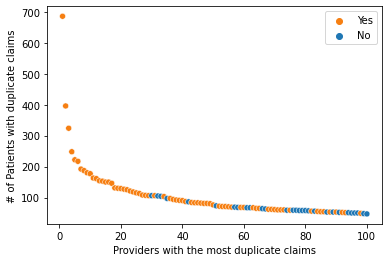

In [18]:
sns.scatterplot('Rank', 'BeneID', data=patient_duplicate_100, hue='PotentialFraud', palette=['#F67F12', '#1f77b4'])
plt.xlabel('Providers with the most duplicate claims')
plt.ylabel('# of Patients with duplicate claims')
plt.legend(loc='upper right')

#Graph shows the top 100 providers ranks by # of duplicated claims, the higher the duplicated amount, the more Potential Fraud Providers we see

In [19]:
inpatient_dupe = inpatient.groupby(['DiagnosisGroupCode', 'ClmAdmitDiagnosisCode', 'InscClaimAmtReimbursed'])[['BeneID']].count().reset_index()

In [20]:
inpatient_dupe = inpatient_dupe[inpatient_dupe['InscClaimAmtReimbursed'] > 0]

In [21]:
inpatient_dupe = inpatient_dupe[inpatient_dupe['BeneID'] > 1]

In [22]:
inpatient_dupe.sort_values(by='BeneID', ascending=False)

DiagnosisGroupCode ClmAdmitDiagnosisCode  InscClaimAmtReimbursed  BeneID
33122                941                 V5789                   15000      13
33516                949                 V5789                   17000      11
29699                853                  0389                   10000      11
4771                 183                   486                    6000      10
33056                940                 V5789                   18000      10
33512                949                 V5789                   13000      10
32973                939                 V5789                   11000      10
33269                946                 V5789                   11000      10
4654                 182                   486                    5000       9
33196                945                 V5789                   12000       9
33055                940                 V5789                   17000       9
4864                 184                   486                    4000       9
33268                946                 V5789                   10000       8
33359                947                 V5789                   13000       8
6093                 196                 78605                    5000       8
33588                950                 V5789                   14000       8
33046                940                 V5789                    8000       8
33514                949                 V5789                   15000       8
4165                 177                   486                    5000       8
4871                 184                 49121                    4000       8
7243                 208                   486                    5000       8
10786                253                 78650                    2000       8
6843                 204                   486                    5000       8
33587                950                 V5789                   13000       8
4770                 183                   486                    5000       8
5062                 186                   486                    7000       8
33194                945                 V5789                   10000       8
9698                 241                 78650                    2000       8
25270                620                 27651                    3000       8
6154                 197                 49121                    6000       8
32976                939                 V5789                   14000       8
33126                941                 V5789                   19000       8
9979                 244                 78650                    2000       8
5109                 186                 78605                    6000       8
33281                946                 V5789                   23000       7
6352                 199                   486                    5000       7
11227                258                 78650                    3000       7
5252                 188                   486                    5000       7
5551                 191                   486                    8000       7
32974                939                 V5789                   12000       7
3863                 168                   486                    5000       7
5349                 189                   486                    5000       7
32982                939                 V5789                   20000       7
5075                 186                 49121                    5000       7
30775                869                  0389                   11000       7
33365                947                 V5789                   19000       7
7242                 208                   486                    4000       7
32981                939                 V5789                   19000       7
33433                948                 V5789                   12000       7
6643                 202                   486          

#### Look at Physician/Patient Relationship per provider

In [24]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [25]:
outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [26]:
ip_md = inpatient[['BeneID', 'ClaimID', 'Provider', 'AttendingPhysician']]
op_md = outpatient[['BeneID', 'ClaimID', 'Provider', 'AttendingPhysician']]

In [27]:
patient_md = pd.concat([ip_md, op_md])

In [28]:
patient_md = patient_md.groupby('Provider')[['AttendingPhysician', 'BeneID']].nunique()

In [29]:
patient_md = pd.merge(patient_md, fraud, on= "Provider")
patient_md

Provider  AttendingPhysician  BeneID PotentialFraud
0     PRV51001                  14      24             No
1     PRV51003                  44     117            Yes
2     PRV51004                  38     138             No
3     PRV51005                   6     495            Yes
4     PRV51007                  10      58             No
5     PRV51008                  10      36             No
6     PRV51011                  28      53             No
7     PRV51012                  14      31             No
8     PRV51013                   9      44             No
9     PRV51014                   7      25             No
10    PRV51015                   3       7             No
11    PRV51016                   3       6             No
12    PRV51017                 113     420             No
13    PRV51021                  69     208            Yes
14    PRV51023                  14      35             No
15    PRV51024                  13      38             No
16    PRV51025                  35      76             No
17    PRV51026                  29      56             No
18    PRV51027                  10      44             No
19    PRV51029                  38      79             No
20    PRV51030                  46     145             No
21    PRV51031                  60     157             No
22    PRV51032                  10      21             No
23    PRV51035                  18      25             No
24    PRV51036                   5     131             No
25    PRV51037                   3     206            Yes
26    PRV51038                  44     107             No
27    PRV51040                  15      69             No
28    PRV51041                   9      31             No
29    PRV51042                  52     128             No
30    PRV51043                   6      20             No
31    PRV51044                   1      39             No
32    PRV51045                  16      29             No
33    PRV51046                   6      26             No
34    PRV51047                  10      11             No
35    PRV51048                  15      33             No
36    PRV51049                  35      65             No
37    PRV51052                  17      37            Yes
38    PRV51053                   1       1             No
39    PRV51054                   3      40             No
40    PRV51055                   6      22             No
41    PRV51056                   5      21             No
42    PRV51057                   1       4             No
43    PRV51058                  31      75             No
44    PRV51059                  30      82            Yes
45    PRV51060                  28      42             No
46    PRV51061                   6      67             No
47    PRV51062                   6     166             No
48    PRV51063                   3     115             No
49    PRV51064                 111     227            Yes
50    PRV51065                   9      26             No
51    PRV51066                   7      21             No
52    PRV51067                  21      49            Yes
53    PRV51068                  79     214             No
54    PRV51070                  46      69             No
55    PRV51071                  11      24             No
56    PRV51072                  47     160             No
57    PRV51074                  14      39             No
58    PRV51075                   4      13             No
59    PRV51076                   8      27             No
60    PRV51077                  11      30            Yes
61    PRV51078                  13      23             No
62    PRV51081                   3     131             No
63    PRV51082                   9      31             No
64    PRV51083                  18      81             No
65    PRV51084                  32      85            Yes
66    PRV51086                  24     115             No
67    PRV51089                  72     197             No
68  

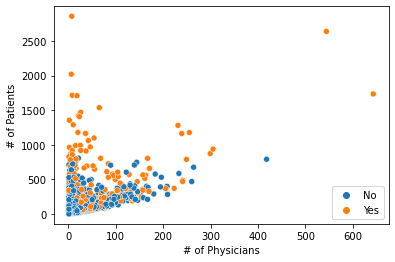

In [247]:
sns.scatterplot(x='AttendingPhysician', y='BeneID', data=patient_md, hue='PotentialFraud')
plt.xlabel('# of Physicians')
plt.ylabel('# of Patients')
plt.legend(loc='lower right')

#### Are the eldery more vulnerable/targeted?

In [31]:
#see if providers who have more elderly claims are more likely to be fraud

In [197]:
patient_age = pd.read_csv('patient.csv')

In [198]:
patient_age.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'Claim Type', 'Provider',
       'PotentialFraud', 'ClmAdmitDiagnosisCode', 'Claim_Diag_Total',
       'ClaimStartDt', 'Claim Duration', 'ClmProcedureCode',
       'Claim_Procedure_Total', 'Total_Chronic', 'DOB', 'Age',
       'Total_Claims_Amount'],
      dtype='object')

In [199]:
patient_age = patient_age[['BeneID', 'ClaimID', 'Provider', 'Age', 'PotentialFraud']]

In [200]:
patient_age.head()

BeneID   ClaimID  Provider  Age PotentialFraud
0  BENE11001  CLM46614  PRV55912   66            Yes
1  BENE11001  CLM66048  PRV55907   67             No
2  BENE11001  CLM68358  PRV56046   67             No
3  BENE11011  CLM38412  PRV52405   95             No
4  BENE11014  CLM63689  PRV56614   71             No

In [201]:
patient_age['Target_Age'] = np.where(
    (patient_age['Age'] > 65), 1, 0)

In [202]:
patient_age = patient_age.groupby('Provider')[['Target_Age']].agg(['sum', 'count'])

In [203]:
patient_age = patient_age.reset_index()

In [204]:
patient_age.columns = patient_age.columns.droplevel()

In [205]:
patient_age.columns = ['Provider', 'Target_Age_Counts', 'Patients']

In [206]:
patient_age['Target_Age_Perc'] = patient_age['Target_Age_Counts'] / patient_age['Patients']

In [207]:
patient_age = pd.merge(patient_age, fraud, on= "Provider")

In [208]:
patient_age

Provider  Target_Age_Counts  Patients  Target_Age_Perc PotentialFraud
0     PRV51001                 22        25         0.880000             No
1     PRV51003                 94       132         0.712121            Yes
2     PRV51004                116       149         0.778523             No
3     PRV51005                883      1165         0.757940            Yes
4     PRV51007                 51        72         0.708333             No
5     PRV51008                 38        43         0.883721             No
6     PRV51011                 49        58         0.844828             No
7     PRV51012                 42        48         0.875000             No
8     PRV51013                 40        46         0.869565             No
9     PRV51014                 19        30         0.633333             No
10    PRV51015                  6         8         0.750000             No
11    PRV51016                  5         6         0.833333             No
12    PRV51017                408       515         0.792233             No
13    PRV51021                203       257         0.789883            Yes
14    PRV51023                 28        36         0.777778             No
15    PRV51024                 28        39         0.717949             No
16    PRV51025                 71        87         0.816092             No
17    PRV51026                 53        76         0.697368             No
18    PRV51027                 42        53         0.792453             No
19    PRV51029                 75        93         0.806452             No
20    PRV51030                132       171         0.771930             No
21    PRV51031                152       185         0.821622             No
22    PRV51032                 16        23         0.695652             No
23    PRV51035                 22        30         0.733333             No
24    PRV51036                216       278         0.776978             No
25    PRV51037                339       454         0.746696            Yes
26    PRV51038                103       141         0.730496             No
27    PRV51040                 70        86         0.813953             No
28    PRV51041                 24        34         0.705882             No
29    PRV51042                121       142         0.852113             No
30    PRV51043                 19        23         0.826087             No
31    PRV51044                 48        59         0.813559             No
32    PRV51045                 24        31         0.774194             No
33    PRV51046                 29        38         0.763158             No
34    PRV51047                  8        11         0.727273             No
35    PRV51048                 23        38         0.605263             No
36    PRV51049                 55        71         0.774648             No
37    PRV51052                 34        46         0.739130            Yes
38    PRV51053                  1         1         1.000000             No
39    PRV51054                 43        57         0.754386             No
40    PRV51055                 14        22         0.636364             No
41    PRV51056                 19        22         0.863636             No
42    PRV51057                  5         5         1.000000             No
43    PRV51058                 72        83         0.867470             No
44    PRV51059                 78        96         0.812500            Yes
45    PRV51060                 32        42         0.761905             No
46    PRV51061                136       145         0.937931             No
47    PRV51062                292       397         0.735516             No
48    PRV51063                106       149         0.711409             No
49    PRV51064                239       303         0.788779            Yes
50    PRV51065                 21        28         0.750000             No
51    PRV51066                 20        24         0.

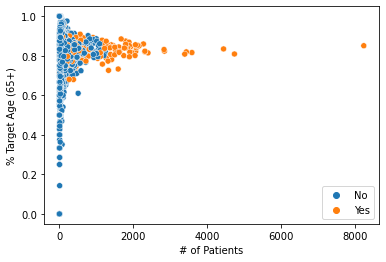

In [209]:
fig = sns.scatterplot(x='Patients', y='Target_Age_Perc', data=patient_age, hue='PotentialFraud')
plt.xlabel('# of Patients')
plt.ylabel('% Target Age (65+)')
plt.legend(loc='lower right')

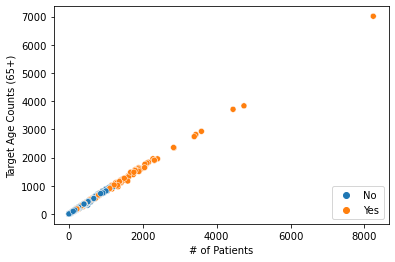

In [210]:
fig = sns.scatterplot(x='Patients', y='Target_Age_Counts', data=patient_age, hue='PotentialFraud')
plt.xlabel('# of Patients')
plt.ylabel('Target Age Counts (65+)')
plt.legend(loc='lower right')

#### Are those with more Chronic Conditions more vulnerable/targeted?

In [91]:
patient_chronic = patient[['BeneID', 'Provider', 'InscClaimAmtReimbursed']]

In [92]:
bene = pd.read_csv('bene.csv')

In [93]:
bene_chronic = bene[['BeneID', 'total_chronic']]

In [94]:
patient_chronic = pd.merge(patient_chronic, bene_chronic, on= "BeneID")

In [95]:
patient_chronic.shape
# patient_chronic.head()

(558211, 4)

In [96]:
# patient_chronic = pd.merge(patient_chronic, fraud, on= "Provider")

patient_chronic = patient_chronic.merge(fraud, on='Provider', how='left')

In [98]:
patient_chronic.shape

(558211, 5)

In [99]:
patient_chronic.head(10)

BeneID  Provider  InscClaimAmtReimbursed  total_chronic PotentialFraud
0  BENE11001  PRV55912                   26000              7            Yes
1  BENE11001  PRV55907                    5000              7             No
2  BENE11001  PRV56046                    5000              7             No
3  BENE11011  PRV52405                    5000              6             No
4  BENE11011  PRV52314                      50              6             No
5  BENE11011  PRV51012                      50              6             No
6  BENE11011  PRV51063                      80              6             No
7  BENE11014  PRV56614                   10000              5             No
8  BENE11014  PRV56835                      60              5             No
9  BENE11017  PRV54986                    8000              9            Yes

In [59]:
###need to split inpatient vs outpatient, the price range is too wide

In [102]:
ip_patient_chronic = inpatient[['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed']]
op_patient_chronic = outpatient[['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed']]

In [105]:
###inpatient
ip_patient_chronic.shape

(40474, 4)

In [108]:
ip_patient_chronic = ip_patient_chronic.merge(bene_chronic, on='BeneID', how='left')

In [109]:
ip_patient_chronic.shape

(40474, 5)

In [110]:
ip_patient_chronic = ip_patient_chronic.merge(fraud, on='Provider', how='left')
ip_patient_chronic.shape

(40474, 6)

In [111]:
ip_patient_chronic.head()

BeneID   ClaimID  Provider  InscClaimAmtReimbursed  total_chronic  \
0  BENE11001  CLM46614  PRV55912                   26000              7   
1  BENE11001  CLM66048  PRV55907                    5000              7   
2  BENE11001  CLM68358  PRV56046                    5000              7   
3  BENE11011  CLM38412  PRV52405                    5000              6   
4  BENE11014  CLM63689  PRV56614                   10000              5   

  PotentialFraud  
0            Yes  
1             No  
2             No  
3             No  
4             No

In [169]:
ip_patient_chronic_avg = ip_patient_chronic.groupby(['total_chronic', 'PotentialFraud'])[['InscClaimAmtReimbursed']].mean()

In [116]:
#export to chart in R
ip_patient_chronic.to_csv('ip_patient_chronic.csv')

In [170]:
ip_patient_chronic_avg.to_csv('ip_patient_chronic_avg.csv')

In [159]:
###outpatient
op_patient_chronic.shape

(517737, 4)

In [160]:
op_patient_chronic = op_patient_chronic.merge(bene_chronic, on='BeneID', how='left')
op_patient_chronic.shape

(517737, 5)

In [161]:
op_patient_chronic = op_patient_chronic.merge(fraud, on='Provider', how='left')
op_patient_chronic.shape

(517737, 6)

In [162]:
op_patient_chronic.head()

BeneID    ClaimID  Provider  InscClaimAmtReimbursed  total_chronic  \
0  BENE11002  CLM624349  PRV56011                      30              0   
1  BENE11003  CLM189947  PRV57610                      80              2   
2  BENE11003  CLM438021  PRV57595                      10              2   
3  BENE11004  CLM121801  PRV56011                      40              6   
4  BENE11004  CLM150998  PRV56011                     200              6   

  PotentialFraud  
0            Yes  
1             No  
2             No  
3            Yes  
4            Yes

In [165]:
op_patient_chronic_avg = op_patient_chronic.groupby(['total_chronic', 'PotentialFraud'])[['InscClaimAmtReimbursed']].mean().reset_index()

In [168]:
op_patient_chronic_avg

total_chronic PotentialFraud  InscClaimAmtReimbursed
0               0             No              223.695352
1               0            Yes              220.604284
2               1             No              236.417559
3               1            Yes              235.815612
4               2             No              239.927643
5               2            Yes              241.223470
6               3             No              252.878068
7               3            Yes              254.460276
8               4             No              276.442632
9               4            Yes              271.246131
10              5             No              305.399377
11              5            Yes              312.302874
12              6             No              324.678244
13              6            Yes              331.653825
14              7             No              330.647267
15              7            Yes              323.642256
16              8             No              326.980376
17              8            Yes              342.611191
18              9             No              338.250675
19              9            Yes              333.698106
20             10             No              336.765511
21             10            Yes              336.653934
22             11             No              477.015707
23             11            Yes              211.142857

In [153]:
#export to chart in R
op_patient_chronic.to_csv('op_patient_chronic.csv')

In [167]:
op_patient_chronic_avg.to_csv('op_patient_chronic_avg.csv')